In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fatal-police-shootings-in-the-us/PercentagePeopleBelowPovertyLevel.csv
/kaggle/input/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv
/kaggle/input/fatal-police-shootings-in-the-us/MedianHouseholdIncome2015.csv
/kaggle/input/fatal-police-shootings-in-the-us/PercentOver25CompletedHighSchool.csv
/kaggle/input/fatal-police-shootings-in-the-us/ShareRaceByCity.csv


# **Analyzes and adjustments were made according to the "gender" variable in the data set. Missing data were identified and adjustments were made. The categorized variables were visualized.**

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width",500)

In [3]:
df = pd.read_csv('/kaggle/input/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv', encoding='cp1252')
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


# **Getting to know the dataset.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [5]:
df.shape

(2535, 14)

# **Classifying variables.**

In [6]:
for col in df.columns:
  if df[col].dtypes == "bool":
    df[col]= df[col].astype(int)
def grab_col_names(data_frame, col_th=10, car_th=100):
    
    cat_col=[ col for col in df.columns if str(df[col].dtype) in ["category","object","bool"]]
    num_but_cat=[col for col in df.columns if df[col].nunique() < col_th and df[col].dtypes in ["int64","float"]]
    cat_col= cat_col + num_but_cat
    cat_but_car=[col for col in cat_col if df[col].nunique() > car_th and str(df[col].dtypes) in ["category","object"]]
    cat_col=[col for col in cat_col if col not in cat_but_car]
    num_col= [col for col in df.columns if df[col].dtypes in ["int","float"]]
    num_col=[col for col in num_col if col not in cat_col]
    print(f"Observations: {data_frame.shape[0]}")
    print(f"Veriable: {data_frame.shape[1]}")
    print(f"cat_cols: {len(cat_col)}")
    print(f"num_cols: {len(num_col)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")
    return cat_col, num_col, cat_but_car

cat_col, num_col, cat_but_car=grab_col_names(df)
cat_but_car

Observations: 2535
Veriable: 14
cat_cols: 9
num_cols: 2
cat_but_car: 3
num_but_cat: 2


['name', 'date', 'city']

# **Analysis and visualization according to variable types.**

###########################SUMMARY###########################
                  manner_of_death     Ratio
shot                         2363  93.21499
shot and Tasered              172   6.78501


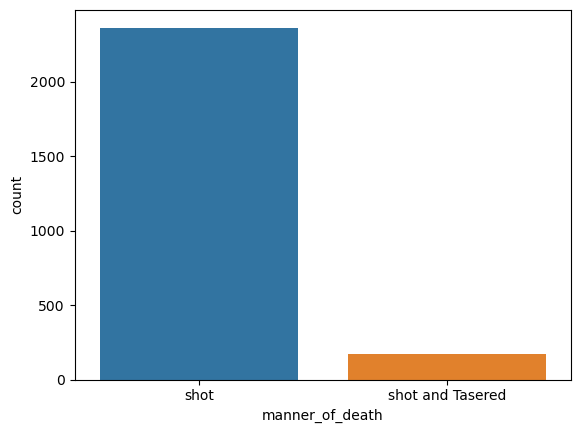

###########################SUMMARY###########################
              armed      Ratio
gun            1398  55.147929
knife           373  14.714004
vehicle         177   6.982249
unarmed         171   6.745562
undetermined    117   4.615385
...             ...        ...
hand torch        1   0.039448
garden tool       1   0.039448
pole              1   0.039448
pick-axe          1   0.039448
pen               1   0.039448

[68 rows x 2 columns]


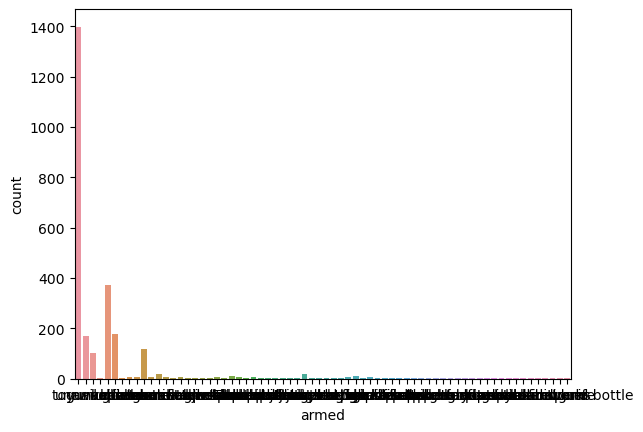

###########################SUMMARY###########################
   gender      Ratio
M    2428  95.779093
F     107   4.220907


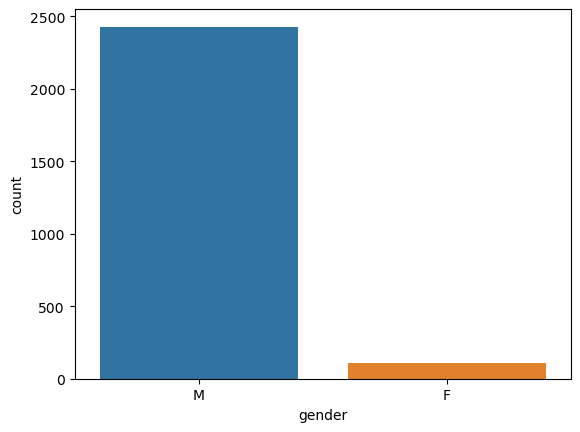

###########################SUMMARY###########################
   race      Ratio
W  1201  47.376726
B   618  24.378698
H   423  16.686391
A    39   1.538462
N    31   1.222880
O    28   1.104536


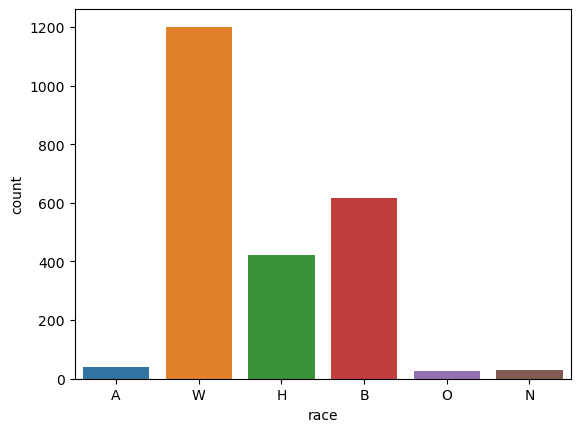

###########################SUMMARY###########################
    state      Ratio
CA    424  16.725838
TX    225   8.875740
FL    154   6.074951
AZ    118   4.654832
OH     79   3.116371
OK     78   3.076923
CO     74   2.919132
GA     70   2.761341
NC     69   2.721893
MO     64   2.524655
IL     62   2.445759
WA     62   2.445759
TN     59   2.327416
LA     57   2.248521
PA     51   2.011834
NM     51   2.011834
AL     50   1.972387
VA     47   1.854043
NY     45   1.775148
SC     44   1.735700
IN     43   1.696252
WI     43   1.696252
KY     43   1.696252
NV     42   1.656805
OR     38   1.499014
MD     38   1.499014
MI     37   1.459566
NJ     35   1.380671
MN     32   1.262327
WV     27   1.065089
AR     26   1.025641
KS     24   0.946746
MS     23   0.907298
UT     23   0.907298
MA     22   0.867850
ID     17   0.670611
AK     15   0.591716
NE     15   0.591716
ME     13   0.512821
IA     12   0.473373
MT     11   0.433925
HI     11   0.433925
DC     11   0.433925
SD     10   0.

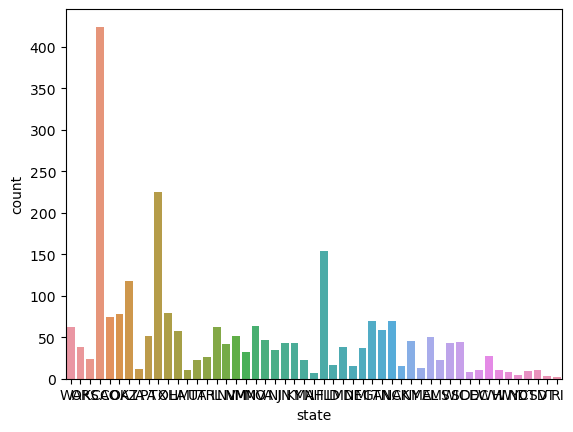

###########################SUMMARY###########################
              threat_level      Ratio
attack                1611  63.550296
other                  766  30.216963
undetermined           158   6.232742


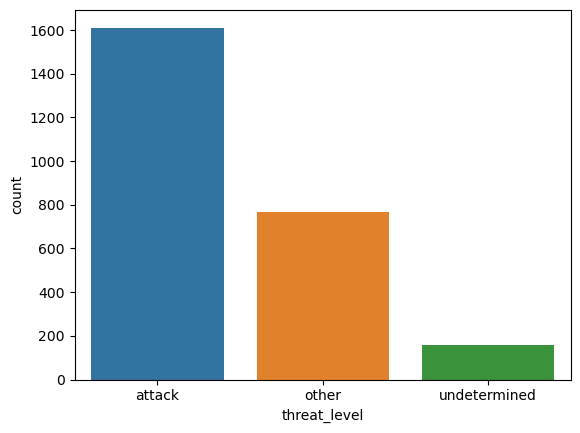

###########################SUMMARY###########################
             flee      Ratio
Not fleeing  1695  66.863905
Car           385  15.187377
Foot          294  11.597633
Other          96   3.786982


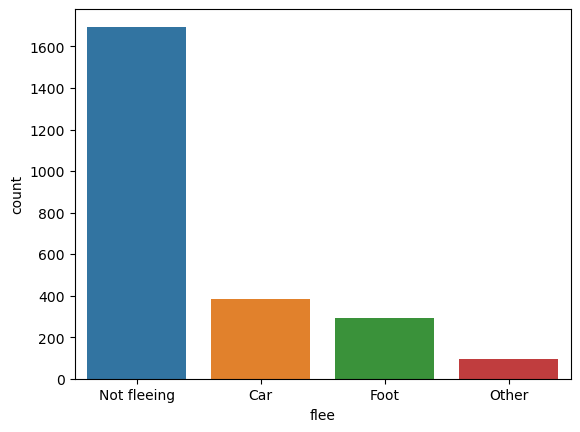

###########################SUMMARY###########################
   signs_of_mental_illness      Ratio
0                     1902  75.029586
1                      633  24.970414


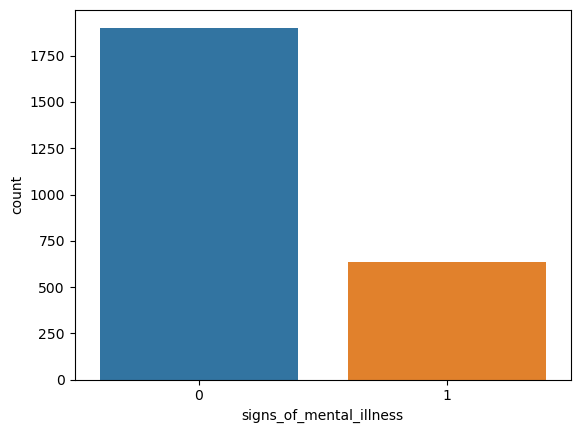

###########################SUMMARY###########################
   body_camera      Ratio
0         2264  89.309665
1          271  10.690335


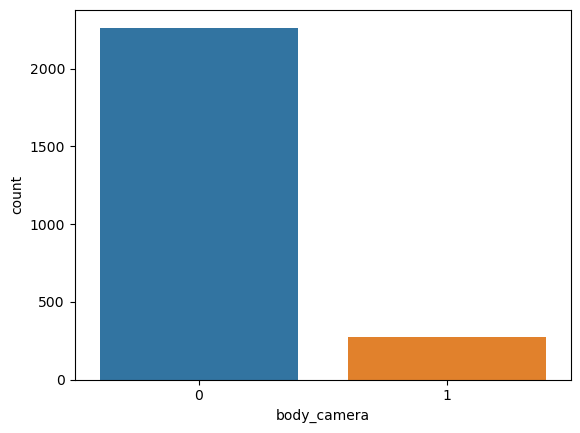

In [7]:
def cat_summary(data_frame, col_name, plot=False):
  print("###########################SUMMARY###########################")
  print(pd.DataFrame({col_name: data_frame[col_name].value_counts(),"Ratio": 100 * data_frame[col_name].value_counts() / len(data_frame)}))
  if plot:
    sns.countplot(x=data_frame[col_name], data=data_frame)
    plt.show(block=True)
for col in cat_col:
  if df[col].dtypes == "bool":
    df[col]= df[col].astype(int)
    cat_summary(df, col, plot=True)
  else:
    cat_summary(df, col, plot=True)

#######################SUMMARY#######################
count    2535.000000
mean     1445.731755
std       794.259490
min         3.000000
25%       768.500000
50%      1453.000000
75%      2126.500000
max      2822.000000
Name: id, dtype: float64


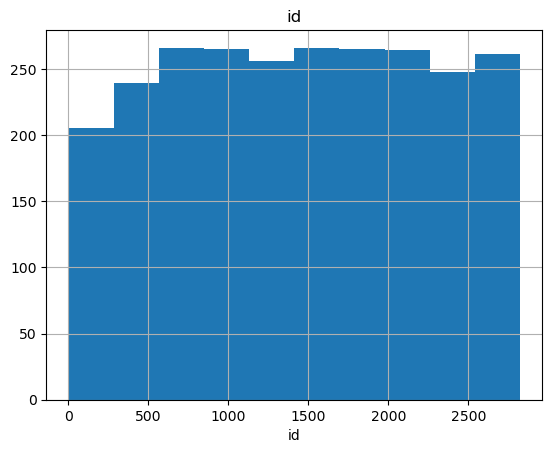

#######################SUMMARY#######################
count    2458.000000
mean       36.605370
std        13.030774
min         6.000000
25%        26.000000
50%        34.000000
75%        45.000000
max        91.000000
Name: age, dtype: float64


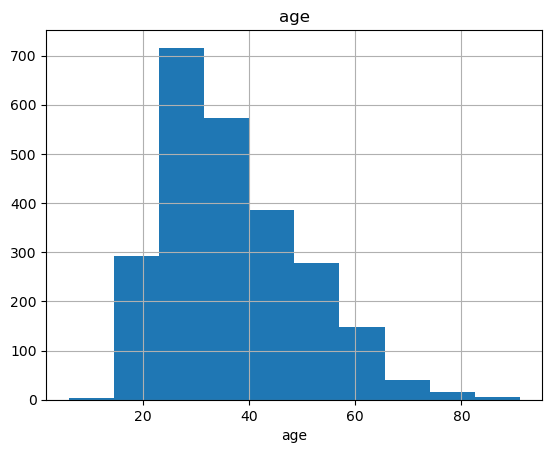

In [8]:
def num_summary(data_frame, num_cols, plot=False):
  print("#######################SUMMARY#######################")
  print(data_frame[num_cols].describe().T)
  if plot:
    data_frame[num_cols].hist()
    plt.xlabel(num_cols)
    plt.title(num_cols)
    plt.show(block=True)
for col in num_col:
  num_summary(df, col, plot=True)

# **Variable deletion.**

In [9]:
drop=["id","date","name","city"]
df=df.drop(drop, axis=1)

In [10]:
df.head()

,manner_of_death,armed,age,gender,race,state,signs_of_mental_illness,threat_level,flee,body_camera
0,shot,gun,53.0,M,A,WA,1,attack,Not fleeing,0
1,shot,gun,47.0,M,W,OR,0,attack,Not fleeing,0
2,shot and Tasered,unarmed,23.0,M,H,KS,0,other,Not fleeing,0
3,shot,toy weapon,32.0,M,W,CA,1,attack,Not fleeing,0
4,shot,nail gun,39.0,M,H,CO,0,attack,Not fleeing,0


# **Categorical variable analysis.**

In [11]:
def cat_anlz(dataframe, target, cat_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(cat_col)[target].mean()}))

for col in cat_col:
    cat_anlz(df, "age", col)


                  TARGET_MEAN
manner_of_death              
shot                36.574672
shot and Tasered    37.023810
                         TARGET_MEAN
armed                               
Taser                      44.333333
air conditioner            41.000000
ax                         42.000000
baseball bat               37.250000
baseball bat and bottle    29.000000
...                              ...
toy weapon                 35.116505
unarmed                    30.882353
undetermined               34.205357
unknown weapon             31.750000
vehicle                    33.168605

[68 rows x 1 columns]
        TARGET_MEAN
gender             
F         36.567308
M         36.607052
      TARGET_MEAN
race             
A       36.605263
B       31.635468
H       32.995157
N       30.451613
O       33.071429
W       40.046980
       TARGET_MEAN
state             
AK       33.066667
AL       37.893617
AR       40.153846
AZ       34.840708
CA       34.606436
CO       34.800000


# **Missing data editing.**

In [12]:
df.isnull().sum()

manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

In [13]:
ort=df[["age"]].mean()

In [14]:
df["age"]= df[["age"]].fillna(ort)

In [15]:
df[["gender"]].value_counts()

gender
M         2428
F          107
dtype: int64

# **Label encoder.**

In [16]:
gender = df["gender"].values
print(gender)

['M' 'M' 'M' ... 'M' 'M' 'M']


In [17]:
le = preprocessing.LabelEncoder()
gender = le.fit_transform(df["gender"])
gender= pd.DataFrame(data=gender)
gender.columns=["gender1"]
gender

,gender1
0,1
1,1
2,1
3,1
4,1
...,...
2530,1
2531,1
2532,1
2533,1


In [18]:
df1=pd.concat([df,gender],axis=1)

In [19]:
df1.drop("gender",axis=1,inplace=True)

In [20]:
df1.head()

,manner_of_death,armed,age,race,state,signs_of_mental_illness,threat_level,flee,body_camera,gender1
0,shot,gun,53.0,A,WA,1,attack,Not fleeing,0,1
1,shot,gun,47.0,W,OR,0,attack,Not fleeing,0,1
2,shot and Tasered,unarmed,23.0,H,KS,0,other,Not fleeing,0,1
3,shot,toy weapon,32.0,W,CA,1,attack,Not fleeing,0,1
4,shot,nail gun,39.0,H,CO,0,attack,Not fleeing,0,1
